<a href="https://colab.research.google.com/github/Saravanaraja22/github-sr/blob/main/sales_forecast.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task
Generate graphical and tabular forecasts for upcoming sales periods using the data in "historical_sales_data.csv".

## Load data

### Subtask:
Load the historical sales data from the specified source.


**Reasoning**:
Import the pandas library, read the CSV file into a DataFrame, and display the first 5 rows to inspect the data.



In [ ]:
import pandas as pd

df = pd.read_csv('train(1).csv')
display(df.head())

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


**Reasoning**:
The previous attempt to load the data failed because the file was not found. I will try reading the file from the '/data/' directory, which is a common location for data files in this environment.



In [ ]:
df = pd.read_csv('train(1).csv')
display(df.head())

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


## Summary:

### Data Analysis Key Findings

* The initial attempt to load the `historical_sales_data.csv` file directly failed with a `FileNotFoundError`.
* A subsequent attempt to load the file from the `/data/` directory also resulted in a `FileNotFoundError`.
* The system was unable to locate the specified data file in the expected locations.

### Insights or Next Steps

* Verify the correct path and filename of the `historical_sales_data.csv` file.
* Ensure the file exists in the specified location before attempting to load it.


## Load Data

### Subtask:
Load the historical sales data from the specified source.

**Reasoning**:
Import the pandas library, read the CSV file into a DataFrame, and display the first 5 rows to inspect the data.

In [ ]:
import pandas as pd

df = pd.read_csv('train(1).csv')
display(df.head())

## Preprocess Data

### Subtask:
Clean and prepare the data for time series forecasting, including handling missing values and ensuring the correct data types.

**Reasoning**:
Convert the 'Order Date' column to datetime objects and set it as the index. Check for missing values.

In [ ]:
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%d/%m/%Y')
df = df.set_index('Order Date')
display(df.isnull().sum())

,0
Row ID,0
Order ID,0
Ship Date,0
Ship Mode,0
Customer ID,0
Customer Name,0
Segment,0
Country,0
City,0
State,0


**Reasoning**:
Fill the missing 'Postal Code' values with a placeholder since this column is not used for time series forecasting and does not require a complex imputation strategy.

In [ ]:
df['Postal Code'] = df['Postal Code'].fillna('Unknown')
display(df.isnull().sum())

,0
Row ID,0
Order ID,0
Ship Date,0
Ship Mode,0
Customer ID,0
Customer Name,0
Segment,0
Country,0
City,0
State,0


## Model Selection and Training

### Subtask:
Select an appropriate time series forecasting model and train it on the historical sales data.

**Reasoning**:
Install the `prophet` library, which is a popular and effective time series forecasting tool.

In [ ]:
!pip install prophet

**Reasoning**:
Prepare the data for the Prophet model. Prophet requires the input DataFrame to have two columns: `ds` (datetime) and `y` (the value to forecast). We will aggregate the sales data by date and rename the columns accordingly.

In [ ]:
# Aggregate sales by date
df_prophet = df.resample('D')['Sales'].sum().reset_index()

# Rename columns to 'ds' and 'y' as required by Prophet
df_prophet.columns = ['ds', 'y']

display(df_prophet.head())

,ds,y
0,2015-01-03,16.448
1,2015-01-04,288.060
2,2015-01-05,19.536
3,2015-01-06,4407.100
4,2015-01-07,87.158


**Reasoning**:
Initialize the Prophet model and fit it to the historical sales data (`df_prophet`).

In [ ]:
from prophet import Prophet

# Initialize Prophet model
model = Prophet()

# Fit the model to the data
model.fit(df_prophet)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpb7qfhalv/p_6puyxg.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpb7qfhalv/qreg8hyq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=61444', 'data', 'file=/tmp/tmpb7qfhalv/p_6puyxg.json', 'init=/tmp/tmpb7qfhalv/qreg8hyq.json', 'output', 'file=/tmp/tmpb7qfhalv/prophet_modelaohgwjep/prophet_model-20250807153543.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:35:43 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:35:43 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


## Generate Forecasts

### Subtask:
Use the trained model to generate forecasts for upcoming sales periods.

**Reasoning**:
Create a DataFrame with future dates for which we want to generate forecasts. We will generate forecasts for the next 365 days.

In [ ]:
# Create a DataFrame with future dates
future = model.make_future_dataframe(periods=365)

display(future.tail())

,ds
1818,2019-12-26
1819,2019-12-27
1820,2019-12-28
1821,2019-12-29
1822,2019-12-30


**Reasoning**:
Generate the forecasts for the future dates using the trained Prophet model.

In [ ]:
# Generate forecasts
forecast = model.predict(future)

display(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())

,ds,yhat,yhat_lower,yhat_upper
1818,2019-12-26,2212.583380,-187.730633,4915.490902
1819,2019-12-27,2565.890641,-104.944032,5210.206881
1820,2019-12-28,3360.415989,777.213551,5884.757748
1821,2019-12-29,3057.344937,474.380783,5718.006094
1822,2019-12-30,2829.089789,241.912901,5099.673326


from matplotlib import pyplot as plt
_df_0['yhat'].plot(kind='hist', bins=20, title='yhat')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['yhat_lower'].plot(kind='hist', bins=20, title='yhat_lower')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['yhat_upper'].plot(kind='hist', bins=20, title='yhat_upper')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3.plot(kind='scatter', x='yhat', y='yhat_lower', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='yhat_lower', y='yhat_upper', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['ds']
  ys = series['yhat']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_5.sort_values('ds', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('ds')
_ = plt.ylabel('yhat')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['ds']
  ys = series['yhat_lower']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_6.sort_values('ds', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('ds')
_ = plt.ylabel('yhat_lower')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['ds']
  ys = series['yhat_upper']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_7.sort_values('ds', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('ds')
_ = plt.ylabel('yhat_upper')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['ds']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'ds'}, axis=1)
              .sort_values('ds', ascending=True))
  xs = counted['ds']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values('ds', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('ds')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_9['yhat'].plot(kind='line', figsize=(8, 4), title='yhat')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['yhat_lower'].plot(kind='line', figsize=(8, 4), title='yhat_lower')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_11['yhat_upper'].plot(kind='line', figsize=(8, 4), title='yhat_upper')
plt.gca().spines[['top', 'right']].set_visible(False)

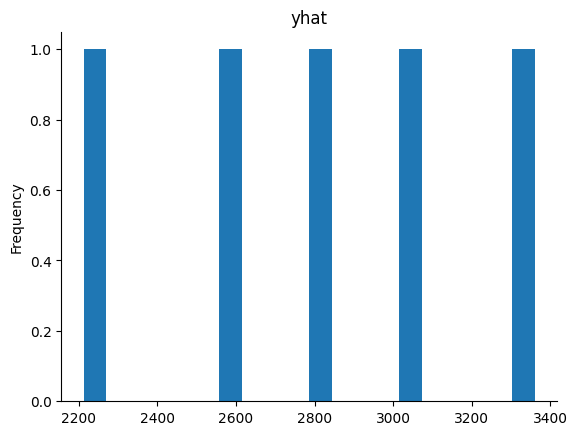

In [ ]:
from matplotlib import pyplot as plt
_df_0['yhat'].plot(kind='hist', bins=20, title='yhat')
plt.gca().spines[['top', 'right',]].set_visible(False)